## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)

## Load dan Cleaning Data

In [ ]:
credit_record = pd.read_csv("credit_record.csv")
app_record = pd.read_csv("application_record.csv")

### Dataset Credit Record

In [ ]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [ ]:
credit_record.describe(include="O")

,STATUS
count,1048575
unique,8
top,C
freq,442031


In [ ]:
credit_record.duplicated().sum()

0

In [ ]:
credit_record.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

### Cleaning Dataset Application Record

In [ ]:
app_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
app_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
app_record.describe(include="O")

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


In [ ]:
app_record.duplicated().sum()

0

In [ ]:
app_record.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
fixed_app_record = app_record.copy()

In [ ]:
fixed_app_record.OCCUPATION_TYPE.fillna("Unknown", inplace=True)

### Merge Data

In [ ]:
df = pd.merge(credit_record, fixed_app_record, on="ID", how="inner")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   STATUS               777715 non-null  object 
 3   CODE_GENDER          777715 non-null  object 
 4   FLAG_OWN_CAR         777715 non-null  object 
 5   FLAG_OWN_REALTY      777715 non-null  object 
 6   CNT_CHILDREN         777715 non-null  int64  
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  int64  
 13  DAYS_EMPLOYED        777715 non-null  int64  
 14  FLAG_MOBIL           777715 non-null  int64  
 15  FLAG_WORK_PHONE  

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

ID                     0
MONTHS_BALANCE         0
STATUS                 0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [ ]:
df.describe()

,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,7.777150e+05,777715.000000,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,-19.373564,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837
std,4.180442e+04,14.082208,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380
min,5.008804e+06,-60.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.044568e+06,-29.000000,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.069530e+06,-17.000000,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115551e+06,-8.000000,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,0.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
df.describe(include="O")

,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,777715,777715,777715,777715,777715,777715,777715,777715,777715
unique,8,2,2,2,5,5,5,6,19
top,C,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Unknown
freq,329536,518851,473355,512948,400164,524261,546619,697151,240048


## Feature Engineering

In [ ]:
#membuat feature usia user
df["AGE"] = np.floor(np.abs(df.DAYS_BIRTH/365))

In [ ]:
gender_codes = {'F': 0, 'M': 1}
df['CODE_GENDER'] = df.CODE_GENDER.map(gender_codes)
df.CODE_GENDER = df.CODE_GENDER.astype('int')

In [ ]:
df['MONTHS_BALANCE'] = np.abs(df.MONTHS_BALANCE)

In [ ]:
df['YEARS_EMPLOYED'] = np.floor(np.abs(df.DAYS_EMPLOYED/365))

In [ ]:
code = {'N': 0, 'Y': 1}

df['FLAG_OWN_CAR'] = df.FLAG_OWN_CAR.map(code)
df.FLAG_OWN_CAR = df.FLAG_OWN_CAR.astype('int')

df['FLAG_OWN_REALTY'] = df.FLAG_OWN_REALTY.map(code)
df.FLAG_OWN_REALTY = df.FLAG_OWN_REALTY.astype('int')

In [ ]:
def approve(x):
    APPROVE=''
    if x in ('2','3','4','5'):
        APPROVE = 0 #Risky
    else :
        APPROVE = 1 #not Risky
    return APPROVE

In [ ]:
df['APPROVE'] = df['STATUS'].apply(approve)

In [ ]:
df.APPROVE.value_counts()

1    774887
0      2828
Name: APPROVE, dtype: int64

In [ ]:
df.describe()

,ID,MONTHS_BALANCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,APPROVE
count,7.777150e+05,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,19.373564,0.332852,0.391352,0.659558,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,43.671326,170.500298,0.996364
std,4.180442e+04,14.082208,0.471234,0.488053,0.473858,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,11.247138,368.181651,0.060192
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000
25%,5.044568e+06,8.000000,0.000000,0.000000,0.000000,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,34.000000,3.000000,1.000000
50%,5.069530e+06,17.000000,0.000000,0.000000,1.000000,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,43.000000,7.000000,1.000000
75%,5.115551e+06,29.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,53.000000,15.000000,1.000000
max,5.150487e+06,60.000000,1.000000,1.000000,1.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,68.000000,1000.000000,1.000000


## EDA

In [ ]:
status_eda = df.STATUS.value_counts()
status_eda

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

AttributeError: ignored

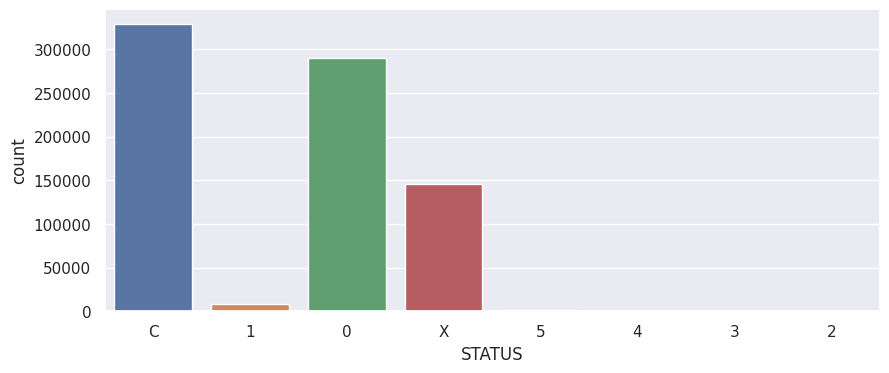

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a= sns.countplot(df.STATUS)
for j in a.containers:
    a.bar_label(j, label_type='center', fmt='%.0f')
plt.title("Status Distribution")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
plt.figure(figsize=(5,5), dpi=100)
plt.pie(status_eda, autopct='%1.1f%%')
plt.title("Status Distribution")
plt.show()

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.histplot(data=df, x=df.MONTHS_BALANCE, bins=10)
for j in a.containers:
    a.bar_label(j, label_type='center')
plt.title("Months Balance Distribution")
plt.xlabel("Month Balance")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(df.CODE_GENDER)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(df.FLAG_OWN_CAR)
for j in a.containers:
    a.bar_label(j, label_type = "center")
plt.title("User's Car Distribution")
plt.xlabel("Own Car")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(df.FLAG_OWN_REALTY)
for j in a.containers:
    a.bar_label(j, label_type = "center")
plt.title("User's Property Distribution")
plt.xlabel("Own Property")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
df.CNT_CHILDREN.value_counts()

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(df.CNT_CHILDREN)
for j in a.containers:
    a.bar_label(j, label_type = "center")
plt.title("User's Children Distribution")
plt.xlabel("Jumlah Anak")
plt.ylabel("Jumlah User")
plt.show()

In [ ]:
df.AMT_INCOME_TOTAL.describe()

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
# a = sns.histplot(data=df, x="AMT_INCOME_TOTAL", bins= 10)
# for j in a.containers:
#     a.bar_label(j, label_type="center")
sns.kdeplot(data=df, x="AMT_INCOME_TOTAL")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
df.NAME_INCOME_TYPE.value_counts()

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(df.NAME_INCOME_TYPE)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.title("Sumber Penghasilan")
plt.xlabel("Sumber Penghasilan")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
df.NAME_EDUCATION_TYPE.value_counts()

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(df.NAME_EDUCATION_TYPE)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.xticks(rotation=45, ha="right")
plt.title("Education Distribution")
plt.xlabel("Pendidikan")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(df.NAME_FAMILY_STATUS)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.xticks(rotation=45, ha="right")
plt.title("Marital Status Distribution")
plt.xlabel("Status Pernikahan")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
df.NAME_HOUSING_TYPE.value_counts()

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(df.NAME_HOUSING_TYPE)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.xticks(rotation=45, ha="right")
plt.title("Housing Distribution")
plt.xlabel("Status Tempat Tinggal")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(df.FLAG_MOBIL)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.title("Mobile Phone Distribution")
plt.xlabel("Mobile Phone Status")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(df.FLAG_WORK_PHONE)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.title("Office Phone Distribution")
plt.xlabel("Office Phone Status")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(df.FLAG_PHONE)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.title("Phone Distribution")
plt.xlabel("Phone Status")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(df.FLAG_EMAIL)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.title("Email Distribution")
plt.xlabel("Email Status")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(df.OCCUPATION_TYPE)
for j in a.containers:
    a.bar_label(j, label_type="center")
plt.title("Occupation Type Distribution")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Occupation Type")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
df.CNT_FAM_MEMBERS.value_counts().sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
sns.kdeplot(data=df, x="AGE")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

In [ ]:
grouped = credit_record.groupby('ID')
grouped.head()

In [ ]:
### convert credit data to wide format which every ID is a row
pivot_tb = credit_record.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min() # smallest value of MONTHS_BALANCE, is the month when loan was granted
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max() # biggest value of MONTHS_BALANCE, might be observe over or canceling account
pivot_tb['ID'] = pivot_tb.index

In [ ]:
pivot_tb

In [ ]:
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] # calculate observe window
pivot_tb.reset_index(drop = True, inplace = True)

In [ ]:
pivot_tb

In [ ]:
credit = pd.merge(credit_record, pivot_tb, on = 'ID', how = 'left')
credit0 = credit.copy()
credit

In [ ]:
credit = credit[credit['window'] > 20] # delete users whose observe window less than 20
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account
credit.sort_values(by = ['ID','month_on_book'], inplace = True)

In [ ]:
credit

In [ ]:
##### denominator
denominator = pivot_tb.groupby(['open_month']).agg({'ID': ['count']}) # count how many users in every month the account was opened
denominator.reset_index(inplace = True)
denominator.columns = ['open_month','sta_sum']
denominator

In [ ]:
#vintage table
vintage = credit.groupby(['open_month','month_on_book']).agg({'ID': ['count']})
vintage.reset_index(inplace = True)
vintage.columns = ['open_month','month_on_book','sta_sum']
vintage['due_count'] = np.nan
vintage = vintage[['open_month','month_on_book','due_count']] # delete aggerate column
vintage = pd.merge(vintage, denominator, on = ['open_month'], how = 'left') # join sta_sum colun to vintage table
vintage

In [ ]:
for j in range(-60,1): # outer loop: month in which account was opened
    ls = []
    for i in range(0,61): # inner loop time after the credit card was granted
        due = list(credit[(credit['status'] == 1) & (credit['month_on_book'] == i) & (credit['open_month'] == j)]['ID']) # get ID which satisfy the condition
        ls.extend(due) # As time goes, add bad customers
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_month'] == j), 'due_count'] = len(set(ls)) # calculate non-duplicate ID numbers using set()

vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum'] # calculate cumulative % of bad customers
vintage

In [ ]:
### Vintage wide table
vintage_wide = vintage.pivot(index = 'open_month',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide

In [ ]:
# plot vintage line chart
vintage0 = vintage_wide.replace(0,np.nan)
lst = [i for i in range(0,61)]
vintage_wide[lst].T.plot(figsize=(10,4))
plt.title("Cumulative % of Bad Customers (> 60 Days Past Due)")
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.legend([])
plt.show()

In [ ]:
lst = []
for i in range(0,61):
    ratio = len(pivot_tb[pivot_tb['window'] < i]) / len(set(pivot_tb['ID']))
    lst.append(ratio)

pd.Series(lst).plot(figsize=(10,4))
plt.title("Observe Window Analysis")
plt.xlabel('Observe Window')
plt.ylabel('account ratio')
plt.legend([])
plt.show()

In [ ]:
text = " ".join(review for review in df.OCCUPATION_TYPE)
word_cloud = WordCloud(stopwords = stopwords, background_color = 'white').generate(text)

plt.figure(figsize = (12, 8), facecolor = None, dpi=200)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   STATUS               777715 non-null  object 
 3   CODE_GENDER          777715 non-null  int64  
 4   FLAG_OWN_CAR         777715 non-null  int64  
 5   FLAG_OWN_REALTY      777715 non-null  int64  
 6   CNT_CHILDREN         777715 non-null  int64  
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  int64  
 13  DAYS_EMPLOYED        777715 non-null  int64  
 14  FLAG_MOBIL           777715 non-null  int64  
 15  FLAG_WORK_PHONE  

In [ ]:
df0 = df.copy()

In [ ]:
# Cek Korelasi
df_korelasi = df.corr()
df_korelasi = df_korelasi['APPROVE'].sort_values(ascending=False)
df_korelasi = pd.DataFrame(df_korelasi)
df_korelasi = df_korelasi.reset_index()
df_korelasi.columns = ['feature', 'APPROVE']
df_korelasi.sort_values(by="APPROVE", ascending=False)

,feature,APPROVE
0,APPROVE,1.000000
1,DAYS_BIRTH,0.005145
2,FLAG_EMAIL,0.003054
3,CNT_FAM_MEMBERS,0.001874
4,FLAG_OWN_REALTY,0.001228
5,CNT_CHILDREN,0.000705
6,FLAG_OWN_CAR,-0.000930
7,YEARS_EMPLOYED,-0.003170
8,AMT_INCOME_TOTAL,-0.003267
9,DAYS_EMPLOYED,-0.003697


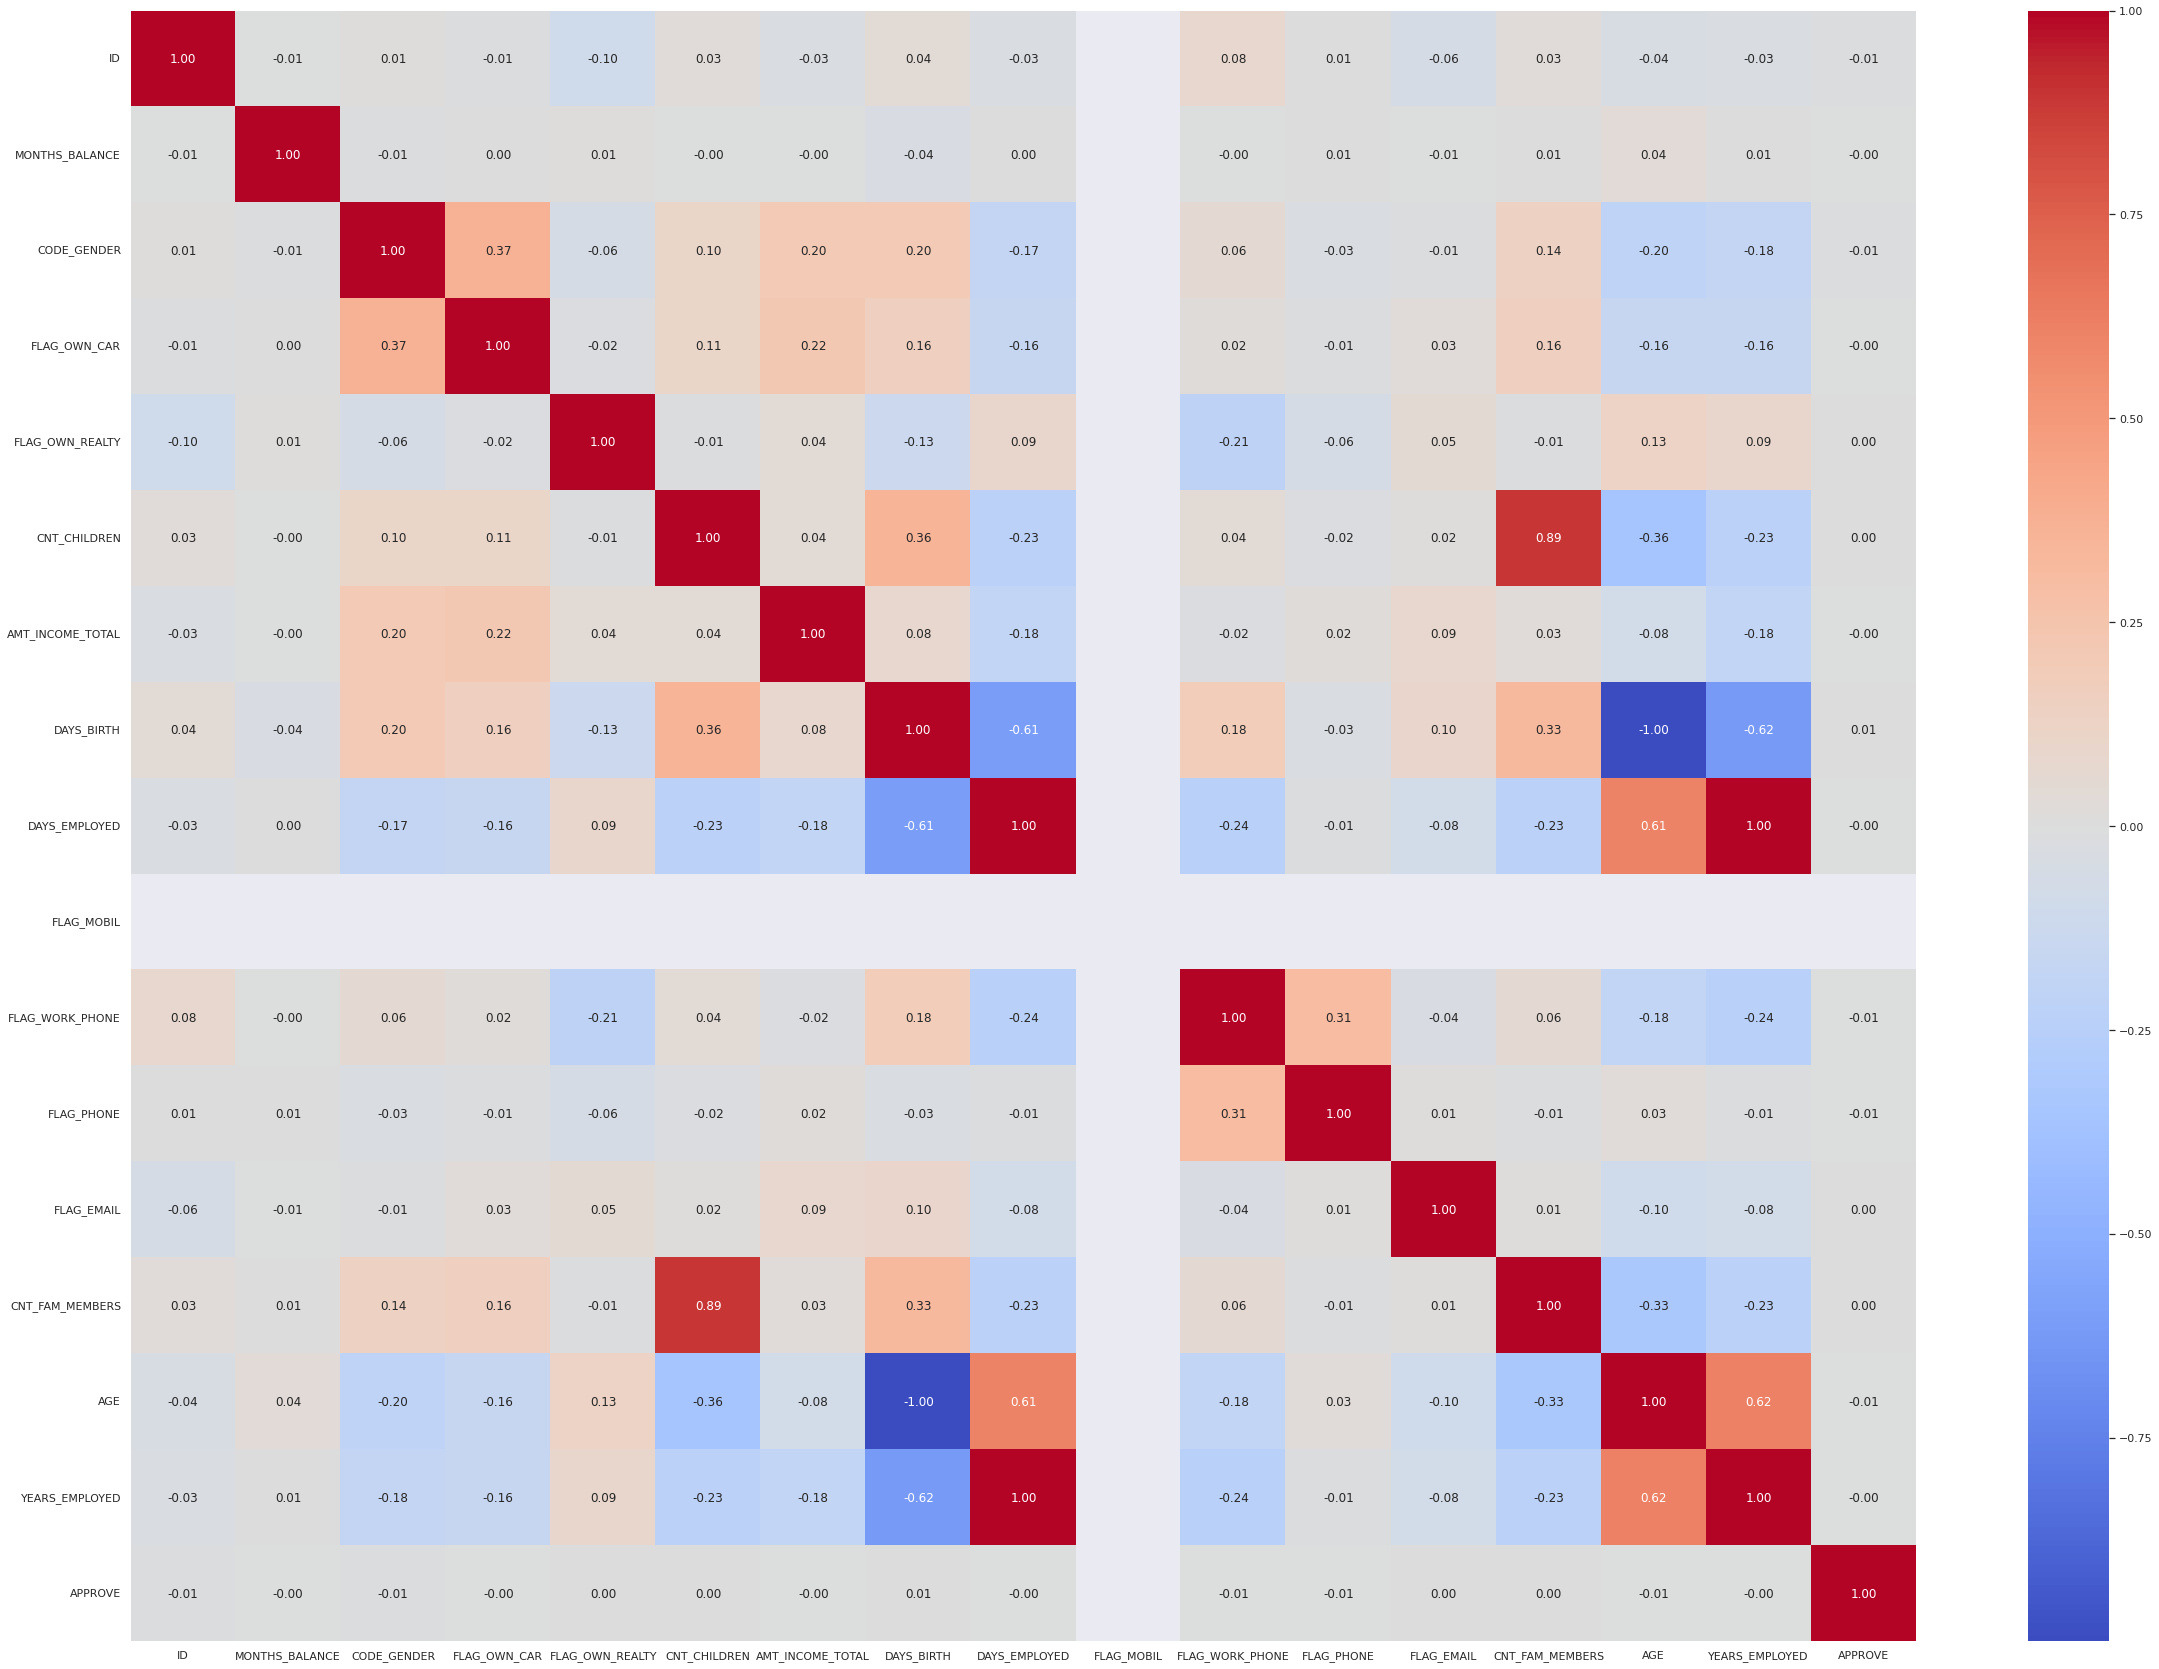

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [ ]:
df = df.drop(columns=["STATUS", "OCCUPATION_TYPE", "DAYS_BIRTH", "FLAG_MOBIL", "CNT_FAM_MEMBERS", "CNT_CHILDREN", "FLAG_OWN_CAR", "FLAG_OWN_REALTY"])

### Outlier Detection

In [ ]:
cols = ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED','AGE']
df[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Variabel Yang Akan Dijadikan Model", fontsize=30)
plt.show()

In [ ]:
# Cek Outlier dengan IQR
def outlier_iqr(data):
    outliers = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    return batas_bawah, batas_atas
    for i in data:
        if i < batas_bawah or i > batas_atas:
            outliers.append(i)
    return outliers
data_outlier = {}
for col in cols:
    data_outlier[col] = outlier_iqr(df[col])
    print('Outlier (',col,') : ',len(data_outlier[col]),' outlier',data_outlier[col])

In [ ]:
# Handling (Monetary)
q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
print('batas_bawah : ',batas_bawah)
print('batas_atas : ',batas_atas)
df['AMT_INCOME_TOTAL'] = np.where(df['AMT_INCOME_TOTAL'] > batas_atas, batas_atas, df['AMT_INCOME_TOTAL'])
df['AMT_INCOME_TOTAL'] = np.where(df['AMT_INCOME_TOTAL'] < batas_bawah, batas_bawah, df['AMT_INCOME_TOTAL'])

In [ ]:
cols = ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED','AGE']
df[cols].boxplot(figsize=(30,15), fontsize=15)
plt.title("Variabel Yang Akan Dijadikan Model", fontsize=30)
plt.show()

In [ ]:
df.AMT_INCOME_TOTAL.describe()

In [ ]:
df.shape

### Define X, y

In [ ]:
input_cols = list(df.columns)[1:-1]
target_col = 'APPROVE'

In [ ]:
input_cols

In [ ]:
target_col

In [ ]:
numeric_cols = df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = df[input_cols].select_dtypes('object').columns.tolist()

In [ ]:
len(numeric_cols)

In [ ]:
len(categorical_cols)

### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df[numeric_cols])

In [ ]:
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [ ]:
df[numeric_cols].describe()

### One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
encoder.fit(df[categorical_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [ ]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [ ]:
encoder.categories_

## Handling Imbalance Data

In [ ]:
X = df[numeric_cols + encoded_cols]
X

In [ ]:
y = df[target_col]
y

In [ ]:
y.value_counts()

In [ ]:
plt.figure(figsize=(5,4), dpi=100)
a = sns.countplot(y)
for j in a.containers:
    a.bar_label(j, label_type="edge")
plt.title("Distribusi Approval")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
# Cek Imbalance Data
#Over Sampling (SMOTE)
from imblearn.over_sampling import SMOTE
from collections import Counter

X, y = SMOTE().fit_resample(X, y)
print(sorted(Counter(y).items()))

In [ ]:
plt.figure(figsize=(10,4), dpi=100)
a = sns.countplot(y)
for j in a.containers:
    a.bar_label(j, label_type="edge")
plt.title("Distribusi Approval Setelah Resample")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

## Modeling

In [ ]:
X.head()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [ ]:
# Jumlah data keseluruhan
print('Jumlah data Predictor (X)  :', X.shape)
print('Jumlah data Target (y)     :', y.shape)
print('==========================================')
# Jumlah Data Train
print('Jumlah data Train (X)      :', X_train.shape)
print('Jumlah data Train (y)      :', y_train.shape)
print('===========================================')
# Jumlah Data Test
print('Jumlah data Test (X)       :', X_test.shape)
print('Jumlah data Test (y)       :', y_test.shape)
print('===========================================')
# Jumlah Data Validation
print('Jumlah data Validation (X) :', X_val.shape)
print('Jumlah data Validation (y) :', y_val.shape)

### Logictic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver="liblinear", random_state=42)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
preds = model.predict(X_test)

In [ ]:
preds

In [ ]:
accuracy_score(preds, y_test)

In [ ]:
confusion_matrix(preds, y_test, normalize='true')

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy : {:.2f}%".format(accuracy * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, preds) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, preds) * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

In [ ]:
train_preds = predict_and_plot(X_train, y_train, 'Training')

In [ ]:
val_preds = predict_and_plot(X_val, y_val, 'Validation')

In [ ]:
test_preds = predict_and_plot(X_test, y_test, 'Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, test_preds))

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Logistic Regresi',mean_absolute_error(y_test, test_preds))

#### Basic Validation

In [ ]:
# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, auc
print('ROC AUC Logistic Regresi',roc_auc_score(y_test, preds))

In [ ]:
def roc_curve_func(y_test, y_pred, nama=''):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  #plt.title('Receiver Operating Characteristic')
  plt.title('ROC Curve {}'.format(nama))
  plt.legend(loc="lower right")

In [ ]:
y_train_pred_proba=model.predict_proba(X_train)[:,1]

In [ ]:
roc_curve_func(y_train,y_train_pred_proba,'Training')

In [ ]:
roc_curve_func(y_test,test_preds,'Test')

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                     'AP={0:0.2f}'.format(average_precision_score(y_test, test_preds)))

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier(criterion='entropy', random_state = 42)

In [ ]:
model_dt.fit(X_train, y_train)

In [ ]:
dt_mod = model_dt.predict(X_test)
dt_mod

In [ ]:
def dt_model(inputs, targets, name=""):
    pred_dt = model_dt.predict(inputs)
    accuracy_dt = accuracy_score(targets, pred_dt)
    print("Accuracy : {:.2f}%".format(accuracy_dt * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_dt) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_dt) * 100))

    cm = confusion_matrix(targets, pred_dt, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlGn')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_dt

In [ ]:
# Train Decision Tree
train_dt = dt_model(X_train, y_train, 'Training')

In [ ]:
# Prediksi Decision Tree
dt_pred = dt_model(X_test, y_test, 'Test')

In [ ]:
# Validation
val_dt = dt_model(X_val, y_val, 'Validation')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Decision Tree',mean_absolute_error(y_test, dt_pred))

In [ ]:
def roc_curve_dt(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")

In [ ]:
roc_curve_dt(y_train,train_dt,'Training')

In [ ]:
roc_curve_dt(y_test, dt_pred,'Test')

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_dt, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, dt_pred)))

In [ ]:
from sklearn.tree import plot_tree, export_text

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model_dt, feature_names=X_train.columns, max_depth=2, filled=True);

In [ ]:
# Akurasi
print('Akurasi Decision Tree     : ',accuracy_score(y_test, dt_pred))
# Precision
print('Precision Decision Tree   : ',precision_score(y_test, dt_pred))
# Recall
print('Recall Decision Tree      : ',recall_score(y_test, dt_pred))
# F1
print('F1 Decision Tree          : ',f1_score(y_test, dt_pred))
# MSE
print('MSE Decision Tree         : ',mean_squared_error(y_test, dt_pred))
# ROC AUC
print('ROC AUC Decision Tree     : ',roc_auc_score(y_test, dt_pred))

### Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_train, y_train)

In [ ]:
# Prediksi Random Forest
rf_mod = model_rf.predict(X_test)
rf_mod

In [ ]:
def rf_model(inputs, targets, name=''):
    pred_rf = model.predict(inputs)
    accuracy_rf = accuracy_score(targets,pred_rf)
    print("Accuracy : {:.2f}%".format(accuracy_rf * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_rf) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_rf) * 100))

    cm = confusion_matrix(targets, pred_rf, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlGn')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_rf

In [ ]:
# Training
train_rf = rf_model(X_train, y_train, 'Training')

In [ ]:
# Prediksi Random Forest
pred_rf = rf_model(X_test, y_test, 'Test')

In [ ]:
# Validation
val_rf = rf_model(X_val, y_val, 'Validation')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Random Forest',mean_absolute_error(y_test, pred_rf))

In [ ]:
def roc_curve_rf(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")

In [ ]:
roc_curve_rf(y_train,train_rf,'Training')

In [ ]:
roc_curve_rf(y_test,pred_rf,'Test')

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_rf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, pred_rf)))

In [ ]:
# Graph Model
from sklearn import tree
plt.figure(figsize=(30,25), dpi=100)
tree.plot_tree(model_rf.estimators_[0], filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns, fontsize=14, max_depth=5, impurity=False, proportion=True, precision=2, label='all')
#tree.plot_tree(model_rf.estimators_[1], filled=True, rounded=True, class_names=['0', '1'], feature_names=X.columns, fontsize=14, max_depth=5, impurity=False)
plt.show()

In [ ]:
# Akurasi
print('Akurasi Random Forest     : ',accuracy_score(y_test, pred_rf))
# Precision
print('Precision Random Forest   : ',precision_score(y_test, pred_rf))
# Recall
print('Recall Random Forest      : ',recall_score(y_test, pred_rf))
# F1
print('F1 Random Forest          : ',f1_score(y_test, pred_rf))
# MSE
print('MSE Random Forest         : ',mean_squared_error(y_test, pred_rf))
# ROC AUC
print('ROC AUC Random Forest     : ',roc_auc_score(y_test, pred_rf))

### Naive Bayes

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

In [ ]:
nb_mod = model_nb.predict(X_test)
nb_mod

In [ ]:
def nb_model(inputs, targets, name=''):
    pred_nb = model_nb.predict(inputs)
    accuracy_nb = accuracy_score(targets,pred_nb)
    print("Accuracy : {:.2f}%".format(accuracy_nb * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_nb) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_nb) * 100))

    cm = confusion_matrix(targets, pred_nb, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_nb

In [ ]:
# Train Naive Bayes
train_nb = nb_model(X_train, y_train, 'Training')

In [ ]:
# Prediksi Naive Bayes
nb_pred = nb_model(X_test, y_test, 'Test')

In [ ]:
# Validation
val_nb = nb_model(X_val, y_val, 'Validation')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, nb_pred))

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE Naive Bayes',mean_absolute_error(y_test, nb_pred))

In [ ]:
def roc_curve_nb(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")

In [ ]:
roc_curve_nb(y_train,train_nb,'Training')

In [ ]:
roc_curve_nb(y_test, nb_pred,'Test')

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_nb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, nb_pred)))

In [ ]:
# Akurasi
print('Akurasi Naive Bayes     : ',accuracy_score(y_test, nb_pred))
# Precision
print('Precision Naive Bayes   : ',precision_score(y_test, nb_pred))
# Recall
print('Recall Naive Bayes      : ',recall_score(y_test, nb_pred))
# F1
print('F1 Naive Bayes          : ',f1_score(y_test, nb_pred))
# MSE
print('MSE Naive Bayes         : ',mean_squared_error(y_test, nb_pred))
# ROC AUC
print('ROC AUC Naive Bayes     : ',roc_auc_score(y_test, nb_pred))

### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xg = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [ ]:
model_xg.fit(X_train, y_train)

In [ ]:
xg_preds = model_xg.predict(X_test)
xg_preds

In [ ]:
def xg_model(inputs, targets, name=''):
    xg_preds = model_xg.predict(inputs)
    accuracy_xg = accuracy_score(targets, xg_preds)
    print("Accuracy : {:.2f}%".format(accuracy_xg * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, xg_preds) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, xg_preds) * 100))

    cm = confusion_matrix(targets, xg_preds, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return xg_preds

In [ ]:
# Train
xgb_train = xg_model(X_train, y_train, name='Train')

In [ ]:
# Val
xgb_val = xg_model(X_val, y_val, name='Validation')

In [ ]:
# Test
xgb_test = xg_model(X_test, y_test, name='Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, xg_preds))

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE XGB',mean_absolute_error(y_test, xg_preds))

In [ ]:
def roc_auc_xgb(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")

In [ ]:
roc_auc_xgb(y_train, xgb_train, 'Training')

In [ ]:
roc_auc_xgb(y_test, xg_preds, 'Test')

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_xg, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, xg_preds)))

In [ ]:
# Akurasi
print('Akurasi XGBoost     : ',accuracy_score(y_test, xg_preds))
# Precision
print('Precision XGBoost   : ',precision_score(y_test, xg_preds))
# Recall
print('Recall XGBoost      : ',recall_score(y_test, xg_preds))
# F1
print('F1 XGBoost          : ',f1_score(y_test, xg_preds))
# MSE
print('MSE XGBoost         : ',mean_squared_error(y_test, xg_preds))
# ROC AUC
print('ROC AUC XGBoost     : ',roc_auc_score(y_test, xg_preds))

### SVM

In [ ]:
# Library SVM
#%%time
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf', C=0.1, gamma=0.1)
model_svm.fit(X_train, y_train)

In [ ]:
def svm_model(inputs, targets, name='' ):
    pred_svm = model_svm.predict(inputs)
    accuracy_svm = accuracy_score(targets, pred_svm)
    print("Accuracy : {:.2f}%".format(accuracy_svm * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_svm) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_svm) * 100))

    cm = confusion_matrix(targets, pred_svm, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_svm

In [ ]:
# Training
train_svm = svm_model(X_train, y_train, 'Training')

In [ ]:
# Prediksi SVM
pred_svm = svm_model(X_test, y_test, 'Test')

In [ ]:
# Validation
val_svm = svm_model(X_val, y_val, 'Validation')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svm))

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE SVM',mean_absolute_error(y_test, pred_svm))

In [ ]:
def roc_curve_svm(y_test, y_pred, nama=''):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  #plt.title('Receiver Operating Characteristic')
  plt.title('ROC Curve {}'.format(nama))
  plt.legend(loc="lower right")

In [ ]:
roc_curve_svm(y_train,train_svm,'Training')

In [ ]:
roc_curve_svm(y_test,pred_svm,'Test')

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_svm, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, pred_svm)))

In [ ]:
# Akurasi Test
print('Akurasi SVM     : ',accuracy_score(y_test, pred_svm))
# Precision
print('Precision SVM   : ',precision_score(y_test, pred_svm))
# Recall
print('Recall SVM      : ',recall_score(y_test, pred_svm))
# F1
print('F1 SVM          : ',f1_score(y_test, pred_svm))
# MSE
print('MSE SVM         : ',mean_squared_error(y_test, pred_svm))
# ROC AUC
print('ROC AUC SVM     : ',roc_auc_score(y_test, pred_svm))

### K Nearest Neighbors (KNN)

In [ ]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

In [ ]:
knn_mod = model_knn.predict(X_test)
knn_mod

In [ ]:
def knn_model(inputs, targets, name=''):
    pred_knn = model_knn.predict(inputs)
    accuracy_knn = accuracy_score(targets,pred_knn)
    print("Accuracy     : {:.2f}%".format(accuracy_knn * 100))
    print('Precision    : {:.2f}%'.format(precision_score(targets, pred_knn) * 100))
    print('Recall       : {:.2f}%'.format(recall_score(targets, pred_knn) * 100))

    cm = confusion_matrix(targets, pred_knn, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_knn

In [ ]:
# Train
knn_train = knn_model(X_train, y_train, name='Train')

In [ ]:
# Test
knn_pred = knn_model(X_test, y_test, name='Test')

In [ ]:
# Validation
knn_val = knn_model(X_val, y_val, name='Validation')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE KNN',mean_absolute_error(y_test, knn_pred))

In [ ]:
def roc_auc_knn(y_test, y_pred, name=''):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(name))
    plt.legend(loc="lower right")

In [ ]:
roc_auc_knn(y_train, knn_train, name='Train')

In [ ]:
roc_auc_knn(y_test, knn_pred, name='Test')

In [ ]:
# Akurasi KNN
print('Akurasi KNN      : ',model_knn.score(X_test, y_test))
# Recall KNN
print('Recall KNN       : ',recall_score(y_test, knn_pred))
# Precision KNN
print('Precision KNN    : ',precision_score(y_test, knn_pred))
# F1 KNN
print('F1 KNN           : ',f1_score(y_test, knn_pred))
# MSE
print('MAE KNN          : ', mean_absolute_error(y_test, knn_pred))
# ROC AUC
print('ROC AUC KNN      : ',roc_auc_score(y_test, knn_pred))

In [ ]:
# Plot Precision Recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
disp = plot_precision_recall_curve(model_knn, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                     'AP={0:0.2f}'.format(average_precision_score(y_test, knn_pred)))


In [ ]:
# Mencari nilai K terbaik
from sklearn.model_selection import cross_val_score
accuracies = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))
plt.plot(range(1, 11), accuracies)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()
print("Nilai K terbaik adalah ", accuracies.index(max(accuracies))+1)
print("Akurasi sebesar", round(max(accuracies)*100), "%")